In [1]:
import pandas as pd

In [4]:
domain_data = pd.read_csv('../H3K9acDomains.csv', sep = '\t')
domain_data.head()

,DomainID,Chr,Start,End,Width,Classification,MedianCount,DetectedInNumSamples
0,peak1,1,713361,715120,1760,Promoter,83,645
1,peak2,1,761305,763147,1843,Promoter,63,452
2,peak3,1,805156,805842,687,Enhancer,30,363
3,peak4,1,839230,840958,1729,Promoter,55,227
4,peak5,1,858838,859156,319,Promoter,18,137


In [5]:
domain_data.shape

(26384, 8)

In [6]:
counts_data = pd.read_csv('../ReadCounts.csv', sep = '\t')
counts_data.head()

,06073025,50109477,22100675,21123474,70883578,50101811,20233939,20180815,85171938,10405008,...,61142759,22776575,50109927,36492755,95491648,76867532,20613887,22868024,50500136,21293107
peak1,101,82,88,78,118,74,102,72,102,85,...,54,47,69,57,103,51,74,39,56,62
peak2,77,51,56,49,80,33,69,49,67,72,...,41,44,66,27,78,31,57,38,50,53
peak3,43,29,23,35,45,21,39,28,53,31,...,25,13,26,17,30,27,22,16,27,21
peak4,73,68,69,50,77,51,73,55,64,65,...,37,36,33,42,52,38,41,23,41,34
peak5,17,33,24,18,24,26,17,22,24,29,...,18,10,13,13,22,15,14,14,16,6


In [7]:
counts_data.shape

(26384, 669)

In [9]:
meta_data = pd.read_csv('../ROSMAP_assay_ChIPseq_metadata.csv')
meta_data.head()

,specimenID,libraryID,assay,platform,referenceSet,libraryBatch,libraryPreparationMethod,sequencingBatch,assayTarget,antibody,...,MappedReads,MappedReadsPercentage,UniquelyMappedReads,UniquelyMappedReadsPercentage,UniquelyMappedUniqueReads,UniquelyMappedUniqueReadsPercentage,NonRedundantFraction,CrossCorrelation,FragmentSize,Pool
0,R2577726,NaN,ChIPSeq,NaN,GRCh37,NaN,NaN,8,H3K9ac,NaN,...,51662021,0.921366,44617225,0.863637,33374153,0.646009,0.748011,0.095119,300,4-Plex
1,R8457289,NaN,ChIPSeq,NaN,GRCh37,NaN,NaN,9,H3K9ac,NaN,...,48633727,0.909100,41487626,0.853063,35358556,0.727038,0.852268,0.067373,270,4-Plex
2,R9217634,NaN,ChIPSeq,NaN,GRCh37,NaN,NaN,18,H3K9ac,NaN,...,53754082,0.915591,46118477,0.857953,31621492,0.588262,0.685658,0.073991,280,4-Plex
3,R8445323,NaN,ChIPSeq,NaN,GRCh37,NaN,NaN,18,H3K9ac,NaN,...,51926854,0.927358,44431183,0.855649,32400763,0.623969,0.729235,0.054230,240,4-Plex
4,R6728038,NaN,ChIPSeq,NaN,GRCh37,NaN,NaN,4,H3K9ac,NaN,...,53013377,0.943492,45665488,0.861396,36281345,0.684381,0.794503,0.102771,270,4-Plex


In [13]:
meta_data.columns

Index(['specimenID', 'libraryID', 'assay', 'platform', 'referenceSet',
       'libraryBatch', 'libraryPreparationMethod', 'sequencingBatch',
       'assayTarget', 'antibody', 'vendor', 'catalogNumber', 'lotNumber',
       'antibodyAmount', 'chromatinAmount', 'isStranded', 'readStrandOrigin',
       'readLength', 'runType', 'totalReads', 'MappedReads',
       'MappedReadsPercentage', 'UniquelyMappedReads',
       'UniquelyMappedReadsPercentage', 'UniquelyMappedUniqueReads',
       'UniquelyMappedUniqueReadsPercentage', 'NonRedundantFraction',
       'CrossCorrelation', 'FragmentSize', 'Pool'],
      dtype='object')

In [11]:
quality_control_data = pd.read_csv('../QualityControl.csv', sep = '\t')
quality_control_data.head()

,SampleID,Batch,TotalReads,MappedReads,UniquelyMappedUniqueReads,NonRedundantFraction,GCBias,CrossCorrelation,FragmentSize,NumberOfPeaks,...,MeanPeakWidth,SdPeakWidth,FractionOfReadsInPeaks,UniquelyMappedUniqueReadsInH3K9acDomains,CorrelationWithMedianSample,Neurons,Astrocytes,Oligodendrocytes,MyeloidCells,EndothelialCells
0,6073025,8,56071130,51662021,33374153,0.748011,1.895237,0.095119,300,23831,...,3357.739877,3170.518889,0.179842,6238033,0.991681,NaN,NaN,NaN,NaN,NaN
1,50109477,9,53496547,48633727,35358556,0.852268,1.772193,0.067373,270,20644,...,3194.660531,2909.313729,0.132553,5472996,0.986054,0.670869,0.139047,0.091245,0.050053,0.029782
2,22100675,18,58709728,53754082,31621492,0.685658,1.775020,0.073991,280,18395,...,3194.104267,2737.542215,0.137631,5211239,0.986137,NaN,NaN,NaN,NaN,NaN
3,21123474,18,55994398,51926854,32400763,0.729235,1.698591,0.054230,240,16315,...,2988.039166,2524.648549,0.103802,4567846,0.989283,NaN,NaN,NaN,NaN,NaN
4,70883578,4,56188504,53013377,36281345,0.794503,2.212362,0.102771,270,26314,...,3740.584252,3660.253624,0.203509,7016778,0.986772,0.729847,0.121844,0.060629,0.089211,0.022281


In [14]:
quality_control_data.columns

Index(['SampleID', 'Batch', 'TotalReads', 'MappedReads',
       'UniquelyMappedUniqueReads', 'NonRedundantFraction', 'GCBias',
       'CrossCorrelation', 'FragmentSize', 'NumberOfPeaks',
       'MeanFoldEnrichment', 'MeanPeakWidth', 'SdPeakWidth',
       'FractionOfReadsInPeaks', 'UniquelyMappedUniqueReadsInH3K9acDomains',
       'CorrelationWithMedianSample', 'Neurons', 'Astrocytes',
       'Oligodendrocytes', 'MyeloidCells', 'EndothelialCells'],
      dtype='object')

In [18]:
clinical_data = pd.read_csv('../RSP_CL.csv')
clinical_data.head()

,projid,Study,msex,educ,race,spanish,apoe_genotype,age_at_visit_max,age_first_ad_dx,age_death,cts_mmse30_first_ad_dx,cts_mmse30_lv,pmi,braaksc,ceradsc,cogdx,dcfdx_lv,individualID
0,10101589,ROS,1.0,20.0,1.0,2.0,34.0,90+,90+,90+,18.0,5.0,9.916667,4.0,2.0,4.0,4.0,R6939144
1,86767530,MAP,0.0,10.0,1.0,2.0,33.0,90+,90+,90+,18.0,10.0,6.500000,4.0,2.0,4.0,4.0,R3893503
2,9650662,MAP,0.0,15.0,1.0,2.0,23.0,90+,90+,90+,0.0,0.0,3.850000,3.0,2.0,4.0,4.0,R8937093
3,50402855,MAP,0.0,21.0,1.0,2.0,33.0,90+,NaN,NaN,NaN,27.0,NaN,NaN,NaN,NaN,1.0,R7139444
4,20544321,ROS,0.0,16.0,1.0,2.0,23.0,90+,90+,NaN,13.0,14.0,NaN,NaN,NaN,NaN,4.0,R4971237


In [19]:
clinical_data = clinical_data.rename(columns = {'projid': 'SampleID'})
clinical_data

,SampleID,Study,msex,educ,race,spanish,apoe_genotype,age_at_visit_max,age_first_ad_dx,age_death,cts_mmse30_first_ad_dx,cts_mmse30_lv,pmi,braaksc,ceradsc,cogdx,dcfdx_lv,individualID
0,10101589,ROS,1.0,20.0,1.0,2.0,34.0,90+,90+,90+,18.0,5.0,9.916667,4.0,2.0,4.0,4.0,R6939144
1,86767530,MAP,0.0,10.0,1.0,2.0,33.0,90+,90+,90+,18.0,10.0,6.500000,4.0,2.0,4.0,4.0,R3893503
2,9650662,MAP,0.0,15.0,1.0,2.0,23.0,90+,90+,90+,0.0,0.0,3.850000,3.0,2.0,4.0,4.0,R8937093
3,50402855,MAP,0.0,21.0,1.0,2.0,33.0,90+,NaN,NaN,NaN,27.0,NaN,NaN,NaN,NaN,1.0,R7139444
4,20544321,ROS,0.0,16.0,1.0,2.0,23.0,90+,90+,NaN,13.0,14.0,NaN,NaN,NaN,NaN,4.0,R4971237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3579,22207815,ROS,0.0,18.0,2.0,2.0,23.0,57.653661875427787,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,1.0,R5306025
3580,22207941,ROS,0.0,16.0,2.0,2.0,34.0,56.651608487337441,NaN,NaN,NaN,27.0,NaN,NaN,NaN,NaN,1.0,R6142763
3581,49333806,MAP,0.0,12.0,2.0,2.0,NaN,56.599589322381931,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,1.0,R4468842
3582,59720188,MAP,0.0,13.0,1.0,1.0,NaN,54.622861054072551,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,1.0,R9446033


In [22]:
clinical_data = pd.merge(clinical_data, quality_control_data, on= 'SampleID', how ='left')

In [23]:
clinical_data.Batch

0       45.0
1        NaN
2       50.0
3        NaN
4        NaN
        ... 
3579     NaN
3580     NaN
3581     NaN
3582     NaN
3583    29.0
Name: Batch, Length: 3584, dtype: float64

In [24]:
clinical_data = clinical_data[~clinical_data.cogdx.isna()]
clinical_data

,SampleID,Study,msex,educ,race,spanish,apoe_genotype,age_at_visit_max,age_first_ad_dx,age_death,...,MeanPeakWidth,SdPeakWidth,FractionOfReadsInPeaks,UniquelyMappedUniqueReadsInH3K9acDomains,CorrelationWithMedianSample,Neurons,Astrocytes,Oligodendrocytes,MyeloidCells,EndothelialCells
0,10101589,ROS,1.0,20.0,1.0,2.0,34.0,90+,90+,90+,...,3080.988174,2520.339137,0.112093,4599491.0,0.984938,0.619105,0.181362,0.069196,0.068191,0.045071
1,86767530,MAP,0.0,10.0,1.0,2.0,33.0,90+,90+,90+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9650662,MAP,0.0,15.0,1.0,2.0,23.0,90+,90+,90+,...,3595.801939,3419.790280,0.191745,6791205.0,0.990027,0.737155,0.149615,0.048505,0.074465,0.028068
5,20630946,ROS,0.0,18.0,1.0,2.0,33.0,90+,90+,90+,...,3200.806379,2852.840966,0.170046,5285836.0,0.989376,0.707102,0.134703,0.069619,0.067119,0.031984
6,39136480,MAP,0.0,15.0,1.0,2.0,34.0,90+,90+,90+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3539,10417638,ROS,1.0,24.0,1.0,2.0,33.0,66.006844626967833,NaN,66.214921286789874,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3543,50106028,MAP,1.0,18.0,1.0,2.0,33.0,65.711156741957566,NaN,65.993155373032167,...,3133.893582,2600.375198,0.134832,4210106.0,0.982032,NaN,NaN,NaN,NaN,NaN
3545,50502282,MAP,0.0,16.0,1.0,2.0,33.0,65.590691307323752,NaN,70.557152635181382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3553,74564064,MAP,1.0,12.0,1.0,1.0,NaN,65.286789869952088,NaN,65.946611909650926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
clinical_data.SampleID = clinical_data.SampleID.astype(str)

In [46]:
clinical_data = clinical_data[clinical_data.SampleID.isin(counts_data.columns.tolist())]

In [47]:
clinical_data

,SampleID,Study,msex,educ,race,spanish,apoe_genotype,age_at_visit_max,age_first_ad_dx,age_death,...,MeanPeakWidth,SdPeakWidth,FractionOfReadsInPeaks,UniquelyMappedUniqueReadsInH3K9acDomains,CorrelationWithMedianSample,Neurons,Astrocytes,Oligodendrocytes,MyeloidCells,EndothelialCells
0,10101589,ROS,1.0,20.0,1.0,2.0,34.0,90+,90+,90+,...,3080.988174,2520.339137,0.112093,4599491.0,0.984938,0.619105,0.181362,0.069196,0.068191,0.045071
5,20630946,ROS,0.0,18.0,1.0,2.0,33.0,90+,90+,90+,...,3200.806379,2852.840966,0.170046,5285836.0,0.989376,0.707102,0.134703,0.069619,0.067119,0.031984
9,10433070,ROS,1.0,13.0,1.0,2.0,23.0,90+,90+,90+,...,3078.231889,2772.556694,0.166198,4311853.0,0.975757,0.700101,0.167639,0.052717,0.070662,0.034329
13,20969088,ROS,0.0,18.0,1.0,2.0,33.0,90+,NaN,90+,...,3246.952232,2889.291774,0.144980,6613035.0,0.989392,0.710092,0.152077,0.069196,0.072918,0.040058
24,20907246,ROS,0.0,13.0,1.0,2.0,33.0,90+,NaN,90+,...,3236.902758,2785.796466,0.138938,4749378.0,0.989393,0.701765,0.123970,0.066592,0.072274,0.031717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3410,20656964,ROS,0.0,18.0,1.0,2.0,33.0,71.227926078028744,NaN,71.310061601642715,...,3261.571706,2853.455918,0.171889,5063051.0,0.983510,0.723253,0.149496,0.044957,0.049850,0.035774
3456,11413170,ROS,1.0,18.0,1.0,2.0,23.0,69.733059548254616,NaN,70.269678302532512,...,3699.652652,3409.152033,0.156311,6571297.0,0.984728,0.718005,0.148203,0.038529,0.057982,0.011811
3498,24039289,MAP,1.0,18.0,1.0,2.0,23.0,68.440793976728273,NaN,72.147843942505133,...,3098.697854,2707.973625,0.137716,4679830.0,0.985259,0.630202,0.190408,0.072206,0.031654,0.031184
3528,11631558,ROS,1.0,12.0,1.0,2.0,23.0,66.959616700889796,NaN,67.370294318959623,...,3129.318539,2610.011484,0.126121,4446312.0,0.985006,0.676756,0.170481,0.070312,0.085687,0.040850


In [48]:
clinical_data.columns

Index(['SampleID', 'Study', 'msex', 'educ', 'race', 'spanish', 'apoe_genotype',
       'age_at_visit_max', 'age_first_ad_dx', 'age_death',
       'cts_mmse30_first_ad_dx', 'cts_mmse30_lv', 'pmi', 'braaksc', 'ceradsc',
       'cogdx', 'dcfdx_lv', 'individualID', 'Batch', 'TotalReads',
       'MappedReads', 'UniquelyMappedUniqueReads', 'NonRedundantFraction',
       'GCBias', 'CrossCorrelation', 'FragmentSize', 'NumberOfPeaks',
       'MeanFoldEnrichment', 'MeanPeakWidth', 'SdPeakWidth',
       'FractionOfReadsInPeaks', 'UniquelyMappedUniqueReadsInH3K9acDomains',
       'CorrelationWithMedianSample', 'Neurons', 'Astrocytes',
       'Oligodendrocytes', 'MyeloidCells', 'EndothelialCells'],
      dtype='object')

In [49]:
clinical_data.braaksc

0       4.0
5       3.0
9       4.0
13      4.0
24      3.0
       ... 
3410    3.0
3456    3.0
3498    2.0
3528    1.0
3543    0.0
Name: braaksc, Length: 642, dtype: float64

In [39]:
s = set([str(i) for i in clinical_data.SampleID.tolist()])

In [41]:
len(s.intersection(set(counts_data.columns.tolist())))

642

([<matplotlib.patches.Wedge at 0x7462ca5a61b0>,
 [Text(0.6491738750498731, 0.8880164863068319, '4.0'),
  Text(-1.0324289957712278, 0.3795923717500314, '3.0'),
  Text(-0.3542206311214057, -1.0414066182274593, '5.0'),
  Text(0.6792052148120974, -0.865263125397155, '2.0'),
  Text(1.0286645786707382, -0.38967830910656653, '1.0'),
  Text(1.0957356016482716, -0.0967651346327836, '0.0'),
  Text(1.0996707581719345, -0.02691140318829902, '6.0')],
 [Text(0.3540948409362944, 0.48437262889463556, '29.9%'),
  Text(-0.5631430886024879, 0.2070503845909262, '29.0%'),
  Text(-0.19321125333894856, -0.5680399735786141, '21.8%'),
  Text(0.37047557171568946, -0.47196170476208443, '9.8%'),
  Text(0.5610897701840389, -0.2125518049672181, '7.5%'),
  Text(0.5976739645354208, -0.05278098252697287, '1.2%'),
  Text(0.5998204135483278, -0.014678947193617646, '0.8%')])

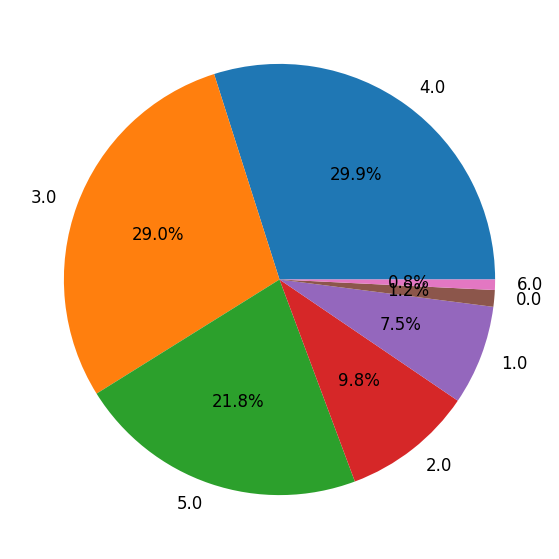

In [70]:
import matplotlib.pyplot as plt

labels = pd.DataFrame(clinical_data.braaksc.value_counts()).index.tolist()
sizes = pd.DataFrame(clinical_data.braaksc.value_counts())['count'].tolist()
fig, ax = plt.subplots(figsize=(10, 7))
ax.pie(sizes, labels=labels, textprops={'size': 'large'},autopct='%1.1f%%')

In [71]:
clinical_data.columns

Index(['SampleID', 'Study', 'msex', 'educ', 'race', 'spanish', 'apoe_genotype',
       'age_at_visit_max', 'age_first_ad_dx', 'age_death',
       'cts_mmse30_first_ad_dx', 'cts_mmse30_lv', 'pmi', 'braaksc', 'ceradsc',
       'cogdx', 'dcfdx_lv', 'individualID', 'Batch', 'TotalReads',
       'MappedReads', 'UniquelyMappedUniqueReads', 'NonRedundantFraction',
       'GCBias', 'CrossCorrelation', 'FragmentSize', 'NumberOfPeaks',
       'MeanFoldEnrichment', 'MeanPeakWidth', 'SdPeakWidth',
       'FractionOfReadsInPeaks', 'UniquelyMappedUniqueReadsInH3K9acDomains',
       'CorrelationWithMedianSample', 'Neurons', 'Astrocytes',
       'Oligodendrocytes', 'MyeloidCells', 'EndothelialCells'],
      dtype='object')

In [75]:
clinical_data[['SampleID','cogdx', 'ceradsc']]

,SampleID,cogdx,ceradsc
0,10101589,4.0,2.0
5,20630946,4.0,4.0
9,10433070,5.0,2.0
13,20969088,2.0,2.0
24,20907246,2.0,3.0
...,...,...,...
3410,20656964,1.0,2.0
3456,11413170,5.0,4.0
3498,24039289,2.0,4.0
3528,11631558,1.0,4.0


In [88]:
Clinically_AD = set(clinical_data[clinical_data.cogdx == 4.0].SampleID)
Clinically_NCI = set(clinical_data[clinical_data.cogdx == 1.0].SampleID)

In [87]:
Pathological_AD = set(clinical_data[clinical_data.ceradsc == 1.0].SampleID)
Pathological_No_AD = set(clinical_data[clinical_data.ceradsc == 4.0].SampleID)


/home/anwer/.local/lib/python3.12/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/home/anwer/.local/lib/python3.12/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

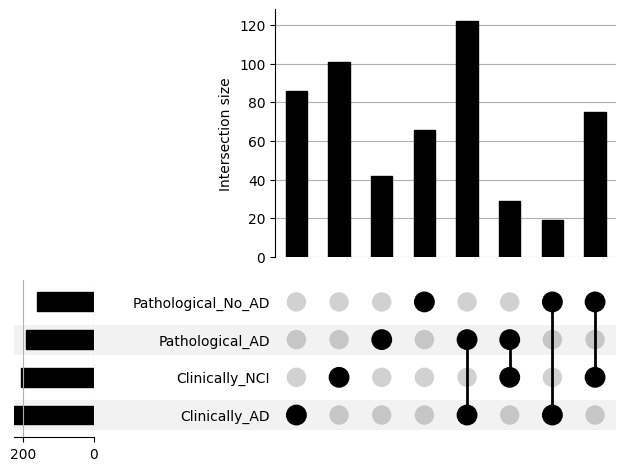

In [95]:
set1 = {0,1,2,3,4,5}
set2 = {3,4,5,6,10}
set3 = {0,5,6,7,8,9}
import pandas as pd
from upsetplot import plot
fig = plt.figure(figsize=(13, 6))
set_names = ['Clinically_AD', 'Clinically_NCI', 'Pathological_AD','Pathological_No_AD']
all_elems = Clincally_AD.union(Clinically_NCI).union(Pathological_AD).union(Pathological_No_AD)
df = pd.DataFrame([[e in Clinically_AD , e in Clinically_NCI, e in Pathological_AD, e in Pathological_No_AD] for e in all_elems], columns = set_names)
df_up = df.groupby(set_names).size()
plot(df_up, fig=fig, element_size=40,orientation='horizontal')
plt.show()

In [97]:
clinical_data

,SampleID,Study,msex,educ,race,spanish,apoe_genotype,age_at_visit_max,age_first_ad_dx,age_death,...,MeanPeakWidth,SdPeakWidth,FractionOfReadsInPeaks,UniquelyMappedUniqueReadsInH3K9acDomains,CorrelationWithMedianSample,Neurons,Astrocytes,Oligodendrocytes,MyeloidCells,EndothelialCells
0,10101589,ROS,1.0,20.0,1.0,2.0,34.0,90+,90+,90+,...,3080.988174,2520.339137,0.112093,4599491.0,0.984938,0.619105,0.181362,0.069196,0.068191,0.045071
5,20630946,ROS,0.0,18.0,1.0,2.0,33.0,90+,90+,90+,...,3200.806379,2852.840966,0.170046,5285836.0,0.989376,0.707102,0.134703,0.069619,0.067119,0.031984
9,10433070,ROS,1.0,13.0,1.0,2.0,23.0,90+,90+,90+,...,3078.231889,2772.556694,0.166198,4311853.0,0.975757,0.700101,0.167639,0.052717,0.070662,0.034329
13,20969088,ROS,0.0,18.0,1.0,2.0,33.0,90+,NaN,90+,...,3246.952232,2889.291774,0.144980,6613035.0,0.989392,0.710092,0.152077,0.069196,0.072918,0.040058
24,20907246,ROS,0.0,13.0,1.0,2.0,33.0,90+,NaN,90+,...,3236.902758,2785.796466,0.138938,4749378.0,0.989393,0.701765,0.123970,0.066592,0.072274,0.031717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3410,20656964,ROS,0.0,18.0,1.0,2.0,33.0,71.227926078028744,NaN,71.310061601642715,...,3261.571706,2853.455918,0.171889,5063051.0,0.983510,0.723253,0.149496,0.044957,0.049850,0.035774
3456,11413170,ROS,1.0,18.0,1.0,2.0,23.0,69.733059548254616,NaN,70.269678302532512,...,3699.652652,3409.152033,0.156311,6571297.0,0.984728,0.718005,0.148203,0.038529,0.057982,0.011811
3498,24039289,MAP,1.0,18.0,1.0,2.0,23.0,68.440793976728273,NaN,72.147843942505133,...,3098.697854,2707.973625,0.137716,4679830.0,0.985259,0.630202,0.190408,0.072206,0.031654,0.031184
3528,11631558,ROS,1.0,12.0,1.0,2.0,23.0,66.959616700889796,NaN,67.370294318959623,...,3129.318539,2610.011484,0.126121,4446312.0,0.985006,0.676756,0.170481,0.070312,0.085687,0.040850


In [96]:
counts_data

,06073025,50109477,22100675,21123474,70883578,50101811,20233939,20180815,85171938,10405008,...,61142759,22776575,50109927,36492755,95491648,76867532,20613887,22868024,50500136,21293107
peak1,101,82,88,78,118,74,102,72,102,85,...,54,47,69,57,103,51,74,39,56,62
peak2,77,51,56,49,80,33,69,49,67,72,...,41,44,66,27,78,31,57,38,50,53
peak3,43,29,23,35,45,21,39,28,53,31,...,25,13,26,17,30,27,22,16,27,21
peak4,73,68,69,50,77,51,73,55,64,65,...,37,36,33,42,52,38,41,23,41,34
peak5,17,33,24,18,24,26,17,22,24,29,...,18,10,13,13,22,15,14,14,16,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
peak26380,13,242,11,10,185,8,12,153,9,252,...,5,6,187,13,179,4,6,142,7,5
peak26381,3,72,1,3,70,1,5,76,4,74,...,0,2,67,16,69,1,2,65,1,3
peak26382,1,30,2,3,31,2,6,28,6,33,...,2,0,23,5,25,2,0,30,6,1
peak26383,2,79,3,1,76,4,6,78,2,77,...,3,5,65,23,66,2,4,63,2,1
